## Practical Work 4

<b>(Adagrad, RMSProp, and Adam)</b> 

#### Import numpy, matplotlib.pyplot and make it inline

In [304]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [305]:
a=-2
b=1

x=np.linspace(0,20)
print(x)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [306]:
y=a*x+b


print(y)


[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Plot your data points. 

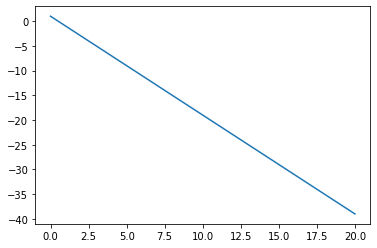

In [307]:
plt.plot(x,y)

## Adagrad

In [308]:
def Adagrad(x,y,learning_rate,epslon,Max_iterations):
    theta0=0
    theta1=1
    v0=0
    v1=0
    m=len(x)
    alpha=learning_rate
    theta0arr=[]
    theta1arr=[]
    lossarr=[]
    harr=[]
    
    for i in range(Max_iterations):
        h=theta0 + theta1 * x
        harr.append(h)
        
        loss=(1/(2*m))*np.sum((h-y)**2)
        lossarr.append(loss)

        theta0arr.append(theta0)
        theta1arr.append(theta1)
        
        gradient0=(1/m)*np.sum(h-y)
        v0 = v0 + (gradient0**2)
        theta0 = theta0 - (alpha/(np.sqrt(v0)+epslon)*gradient0)
        
        gradient1=(1/m)*np.sum((h-y)*x)
        v1 = v1 + (gradient1**2)
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epslon)*gradient1)
        
        if loss < 0.1:
            break;
            
            
    return theta0arr,theta1arr,lossarr,harr,theta0,theta1,h
    
        


In [309]:
theta0arr , theta1arr , lossarr , harr , theta0 , theta1 ,h = Adagrad (x,y,0.5,1e-8,1000)

#### Calculate r2 score

In [310]:
import sklearn
from sklearn.metrics import r2_score

In [311]:
sklearn.metrics.r2_score(h,y)

0.9984572073135131

#### Plot loss vs. epochs

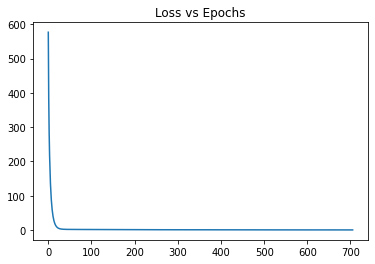

In [312]:
plt.plot(lossarr) 
plt.title('Loss vs Epochs')                   ###Loss vs epochs
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

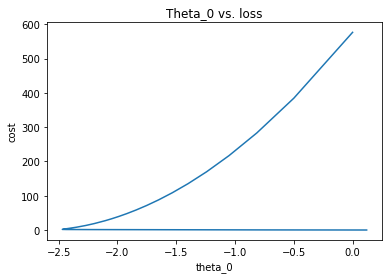

In [313]:
plt.plot(theta0arr, lossarr)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

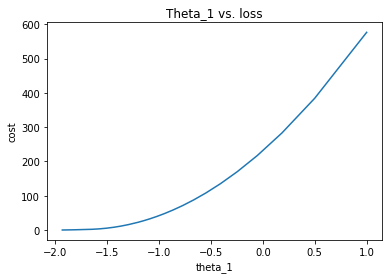

In [314]:
plt.plot(theta1arr, lossarr)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

#### Plot all regression lines till converge

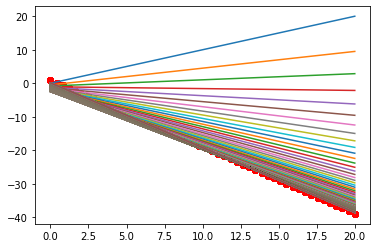

In [315]:
for i in range(len(harr)):
    plt.plot(x,harr[i])
    plt.scatter(x,y,color="Red")
plt.show()

#### Plot the best regression line

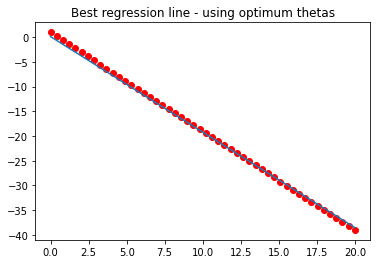

In [316]:
plt.scatter(x,y,color="red")
plt.plot(x,h)
plt.title('Best regression line - using optimum thetas')
plt.show()

## RMSProp

In [317]:
def RMSProp(x,y,learning_rate,epslon,Max_iterations,beta):
    theta0=0
    theta1=1
    v0=0
    v1=0
    m=len(x)
    alpha=learning_rate
    theta0arr=[]
    theta1arr=[]
    lossarr=[]
    harr=[]
    
    for i in range(Max_iterations):
        h=theta0 + theta1 * x
        harr.append(h)
        
        loss=(1/(2*m))*np.sum((h-y)**2)
        lossarr.append(loss)

        theta0arr.append(theta0)
        theta1arr.append(theta1)
        
        gradient0=(1/m)*np.sum(h-y)
        v0 = beta * v0 + (1-beta) *(gradient0**2)
        theta0 = theta0 - (alpha/(np.sqrt(v0)+epslon)*gradient0)
        
        gradient1=(1/m)*np.sum((h-y)*x)
        v1 = beta * v1 + (1-beta) * (gradient1**2)
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epslon)*gradient1)
        
        if loss < 0.1:
            break;
            
            
    return theta0arr,theta1arr,lossarr,harr,theta0,theta1
    

In [318]:
theta0arr , theta1arr , lossarr , harr , theta0 , theta1 = RMSProp(x,y,0.25,1e-8,130,0.98)

#### Calculate r2 score

In [319]:
import sklearn
from sklearn.metrics import r2_score

In [320]:
sklearn.metrics.r2_score(h,y)

0.9984572073135131

In [321]:
theta0arr

[0,
 -1.767766948656023,
 -2.3259978563231924,
 -2.507391838183567,
 -2.5449895414193247,
 -2.5271803840509497,
 -2.488405442059198,
 -2.4419316500183554,
 -2.392786185951125,
 -2.3428427856634233,
 -2.292789595951673,
 -2.2428770502280444,
 -2.193196951729943,
 -2.1437846895503907,
 -2.094655963362465,
 -2.045819718997952,
 -1.9972826118733142,
 -1.9490505139643868,
 -1.901129010511241,
 -1.853523558884056,
 -1.8062395369651585,
 -1.7592822562184607,
 -1.7126569637333042,
 -1.666368840905061,
 -1.6204230011116805,
 -1.5748244870951036,
 -1.5295782682559393,
 -1.484689237922027,
 -1.440162210609097,
 -1.3960019192799604,
 -1.352213012605515,
 -1.308800052230099,
 -1.265767510043578,
 -1.223119765462579,
 -1.1808611027233573,
 -1.138995708188842,
 -1.0975276676724977,
 -1.0564609637817048,
 -1.0157994732834397,
 -0.975546964495107,
 -0.935707094703448,
 -0.8962834076145187,
 -0.8572793308377961,
 -0.8186981734075358,
 -0.780543123344566,
 -0.7428172452617586,
 -0.7055234780164739,
 -0.6

In [322]:
theta1arr

[1,
 -0.767766952649175,
 -1.358419483160315,
 -1.5858474037752812,
 -1.6752381215259338,
 -1.7113916372654197,
 -1.7272522798096972,
 -1.735496126509077,
 -1.740922617920465,
 -1.7453173423186088,
 -1.74933254180998,
 -1.7532018961696,
 -1.7570073546745921,
 -1.76077690884869,
 -1.7645197384006752,
 -1.7682385980950486,
 -1.77193409555501,
 -1.7756061380162986,
 -1.7792544112309612,
 -1.7828785345820837,
 -1.7864781102726737,
 -1.790052738653515,
 -1.7936020229827632,
 -1.7971255709680534,
 -1.8006229953541273,
 -1.8040939142349794,
 -1.8075379512888325,
 -1.8109547359922096,
 -1.8143439038285405,
 -1.8177050964953227,
 -1.8210379621107609,
 -1.8243421554199923,
 -1.8276173380007907,
 -1.8308631784685838,
 -1.8340793526806038,
 -1.83726554393898,
 -1.8404214431925758,
 -1.843546749237367,
 -1.8466411689151543,
 -1.8497044173103943,
 -1.8527362179449283,
 -1.8557363029703862,
 -1.8587044133580328,
 -1.8616402990858236,
 -1.8645437193224275,
 -1.8674144426079735,
 -1.8702522470312741,
 

In [323]:
lossarr

[576.6224489795919,
 71.98440412697289,
 11.913897993484907,
 3.1764511460126768,
 1.8738011335353206,
 1.6504120968367821,
 1.579967547183717,
 1.5311508780132517,
 1.4859573540621462,
 1.4419998351328849,
 1.3989689873754834,
 1.3568218829364402,
 1.315548311205543,
 1.2751417291918734,
 1.235595784999646,
 1.1969039197188227,
 1.159059326953832,
 1.1220549528764021,
 1.0858835010057137,
 1.0505374377287733,
 1.016008998095632,
 0.9822901918221785,
 0.9493728094839982,
 0.9172484288931617,
 0.88590842165144,
 0.8553439598736956,
 0.8255460230750231,
 0.7965054052149827,
 0.7682127218919846,
 0.7406584176805725,
 0.7138327736041147,
 0.687725914735098,
 0.6623278179149706,
 0.6376283195852268,
 0.6136171237211405,
 0.5902838098593651,
 0.5676178412103324,
 0.5456085728461958,
 0.5242452599548512,
 0.5035170661503555,
 0.4834130718299058,
 0.4639222825673475,
 0.44503363753305797,
 0.4267360179298847,
 0.40901825543472087,
 0.39186914063519446,
 0.37527743145085224,
 0.3592318615281641

In [324]:
harr

[array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
         2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
         4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
         6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
         8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
        10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
        12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
        14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
        16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
        18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ]),
 array([ -1.76776695,  -2.08114122,  -2.39451548,  -2.70788975,
         -3.02126401,  -3.33463828,  -3.64801255,  -3.96138681,
         -4.27476108,  -4.58813535,  -4.90150961,  -5.21488388,
         -5.52825815,  -5.84163241,  -6.15500668,  -6.46838094,
         -6.

In [325]:
theta0

0.15569231019844712

In [326]:
 theta1

-1.9357755840131747

#### Plot loss vs. epochs

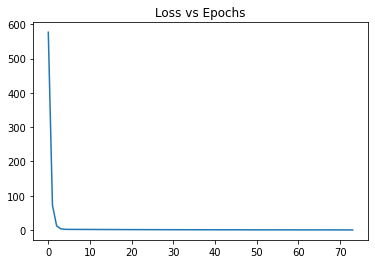

In [327]:

plt.plot(lossarr) 
plt.title('Loss vs Epochs')                   ###Loss vs epochs
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

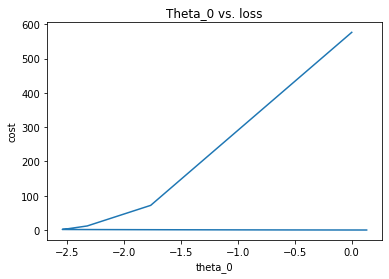

In [328]:
plt.plot(theta0arr, lossarr)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

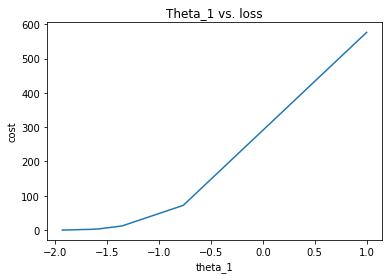

In [329]:

plt.plot(theta1arr, lossarr)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

#### Plot all regression lines till converge

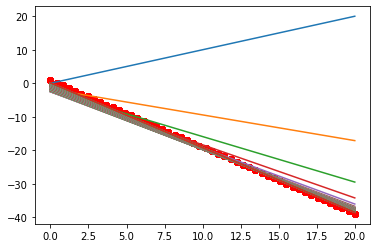

In [330]:
for i in range(len(harr)):
    plt.plot(x,harr[i])
    plt.scatter(x,y,color="Red")
plt.show()

#### Plot the best regression line

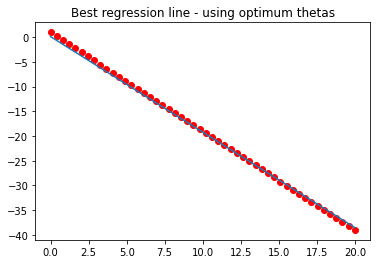

In [331]:
plt.scatter(x,y,color="red")
plt.plot(x,h)
plt.title('Best regression line - using optimum thetas')
plt.show()

## Adam

In [332]:
def Adam (x,y,learning_rate,epslon,Max_iterations,beta1,beta2):
    theta0=0
    theta1=1
    v0=0
    v1=0
    m0=0
    m1=0
    m=len(x)
    alpha=learning_rate
    theta0arr=[]
    theta1arr=[]
    lossarr=[]
    harr=[]
    
    for i in range(Max_iterations):
        h=theta0 + theta1 * x
        harr.append(h)
        
        loss=(1/(2*m))*np.sum((h-y)**2)
        lossarr.append(loss)

        theta0arr.append(theta0)
        theta1arr.append(theta1)
        
        gradient0=(1/m)*np.sum(h-y)
        m0= beta1 * m0 + (1-beta1) * (gradient0)
        v0 = beta2 *v0 + (1-beta2) * (gradient0**2)
        theta0 = theta0 - (alpha/(np.sqrt(v0)+epslon)*m0)
        
        gradient1=(1/m)*np.sum((h-y)*x)
        m1= beta1 * m1 + (1-beta1) * (gradient1)
        v1 = beta2 * v1 + (1-beta2) * (gradient1**2)
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epslon)*m1)
        
        if loss < 0.1:
            break;
            
            
    return theta0arr,theta1arr,lossarr,harr,theta0,theta1
    

In [333]:
theta0arr , theta1arr , lossarr , harr , theta0 , theta1 = Adam(x,y,0.3,1e-8,350,0.9,0.999)

#### Calculate r2 score

In [349]:
import sklearn
from sklearn.metrics import r2_score

In [350]:
sklearn.metrics.r2_score(h,y)

0.9984572073135131

In [334]:
theta0arr

[0,
 -0.9486832877056856,
 -2.17969226302305,
 -3.4129902935322107,
 -4.258085684797691,
 -4.495654854903985,
 -4.227548025649222,
 -3.626782771077592,
 -2.8455076990176833,
 -2.0273199764257597,
 -1.3160272712538297,
 -0.8299064226499517,
 -0.6211526383127758,
 -0.6701442913707774,
 -0.9128288365813287,
 -1.2657523006645417,
 -1.6391029793251515,
 -1.9472287685990903,
 -2.1233320580897246,
 -2.133423595539241,
 -1.9797217601868695,
 -1.6929217651980308,
 -1.3210966433357487,
 -0.920270267216097,
 -0.5462228105531186,
 -0.24593808346599366,
 -0.049615158619889604,
 0.033711218090757,
 0.015241125025835797,
 -0.07846458070106814,
 -0.21185477666131125,
 -0.3468879066784762,
 -0.4492852420657738,
 -0.4939897907951246,
 -0.4687249000637382,
 -0.3747728755476129,
 -0.22511917328226866,
 -0.04090827223269866,
 0.15282718268937975]

In [335]:
theta1arr

[1,
 0.051316702710750506,
 -1.1824008443869891,
 -2.4341489363455766,
 -3.336180688293484,
 -3.660238468829631,
 -3.4841129814611365,
 -2.973554634797881,
 -2.2823266537748728,
 -1.557762859166664,
 -0.946527265831542,
 -0.5664705965310597,
 -0.4663021118049302,
 -0.6231160022110497,
 -0.9717523317299287,
 -1.4293538471381466,
 -1.9072176657284885,
 -2.3203018021038733,
 -2.601395428874718,
 -2.7153360769800816,
 -2.6632234407234794,
 -2.4752705932760692,
 -2.1996941249074946,
 -1.8929313860512966,
 -1.6110696080206497,
 -1.4010828287483483,
 -1.2928767222500384,
 -1.2951242657855524,
 -1.3964077455045782,
 -1.570158254337991,
 -1.7809487483475286,
 -1.9908659023909336,
 -2.1656726814407667,
 -2.280257036971022,
 -2.322249501983944,
 -2.2928770435758934,
 -2.2051459963929863,
 -2.0802852676716728,
 -1.9434330487423304]

In [336]:
 lossarr

[576.6224489795919,
 245.31421565519793,
 24.077383361523346,
 41.59009997293054,
 204.3210569027298,
 291.9766351605954,
 239.58413228074124,
 119.57982708441446,
 23.618970594499284,
 4.365689053376123,
 53.02523137060251,
 113.84043248037925,
 134.86592090377044,
 106.07571073631365,
 53.36630410968691,
 11.568045648921608,
 1.613571187540945,
 20.692446516650485,
 48.018980332672484,
 61.7854937910302,
 53.825167671530465,
 31.637049506428294,
 10.014482395538822,
 0.559756490533597,
 5.3690313245748715,
 17.47151041185888,
 26.803813464725295,
 27.117034966221016,
 19.07702656217412,
 8.389136779257313,
 1.3112514700388465,
 0.7896463327248944,
 5.299784463181391,
 10.592712683074133,
 12.805160541908705,
 10.748210235649585,
 6.098029255097927,
 1.8115408015853485,
 0.09512913647988556]

In [337]:
harr

[array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
         2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
         4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
         6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
         8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
        10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
        12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
        14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
        16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
        18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ]),
 array([-0.94868329, -0.92773769, -0.9067921 , -0.88584651, -0.86490092,
        -0.84395532, -0.82300973, -0.80206414, -0.78111854, -0.76017295,
        -0.73922736, -0.71828177, -0.69733617, -0.67639058, -0.65544499,
        -0.63449939, -0.6135538 , -0.59260821, -0

In [338]:
theta0

0.3315416892941686

In [339]:
theta1

-1.819221516657904

#### Plot loss vs. epochs

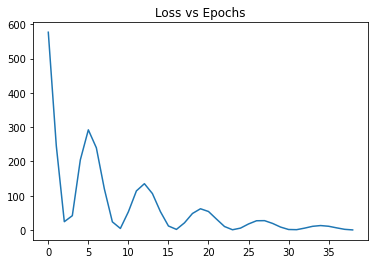

In [340]:
plt.plot(lossarr) 
plt.title('Loss vs Epochs')                   ###Loss vs epochs
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

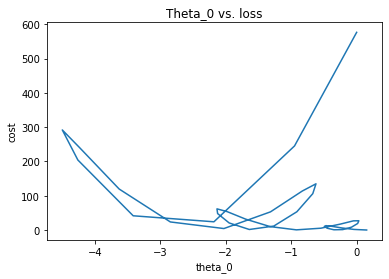

In [341]:
plt.plot(theta0arr, lossarr)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

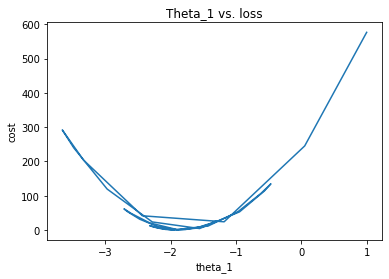

In [342]:

plt.plot(theta1arr, lossarr)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

#### Plot all regression lines till converge

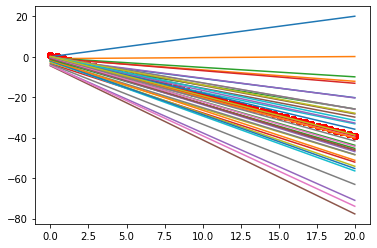

In [343]:
for i in range(len(harr)):
    plt.plot(x,harr[i])
    plt.scatter(x,y,color="Red")
plt.show()

#### Plot the best regression line

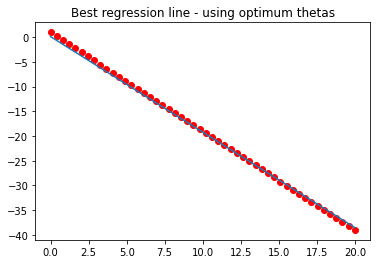

In [344]:
plt.scatter(x,y,color="red")
plt.plot(x,h)
plt.title('Best regression line - using optimum thetas')
plt.show()